### Computational Guided Inquiry for PChem (Neshyba, 2021)

# The Carnot Cycle

## Introduction

The purpose of any heat engine is to generate a useable form of energy (such as electricity) from the heat extracted from a hot reservoir (such as a furnace). A *Carnot heat engine* is a theoretical heat engine in which one imagines taking an ideal gas through a sequence of reversible expansions and contractions of an ideal gas that ends up with the gas in the exact same state it started in. This sequence is called a *Carnot cycle*, and is often depicted in an *indicator diagram* such as Fig. 1. The upper curve of this cycle (from point A to B) is the isothermal heat extraction leg that gets the engine started: during this leg, the gas is in thermal contact with the hot reservoir and extracts heat from it. Subsequent legs of the cycle trace out a clockwise closed loop in this diagram, as indicated by the arrows in the figure. The cycle is called a *closed thermodynamic cycle* because the gas returns to its initial state at the end. 

<p style='text-align: center;'>
<img src="cycle1.jpg" height="400" width="400"/>

__Figure 1__. Indicator diagram showing a Carnot cycle acting as a heat engine. 
</p>


## Reversible PV work
An important property of a Carnot cycle is the work done,

$$
w = -\int P dV \space  (each \ leg) \ \ \ \ (1)
$$

where the integration limits are the endpoints of each leg, and it's assumed that the system's pressure, $P$, is is never very far from the pressure outside, $P_{ex}$. This is called the condition of *reversibility*. 

As long as we know the path -- the details of how the pressure changes as a function of volume -- we can calculate the work *numerically* by using the trapezoidal rule. In the special case of isothermal reversible expansion or compression of an ideal gas, we have the *analytical* result that

$$
w_{isotherm} = -n R T \ ln \bigl ( \frac {V_{final}} {V_{initial}} \bigr ) \ \ \ \ (2)
$$

where, e.g., for the first leg of the Carnot cycle, $V_{final}=V_B$ and $V_{initial}=V_A$. We'll be using both approaches -- numerical and analytical -- in this exercise, to help verify we haven't made a mistake anywhere.


## Thermal power generators
Both equations above say that *expansions* (leg 1 from A to B, and leg 2 from B to C) should have $w<0$, while *compressions* (legs 3 and 4) should have $w>0$. Since the whole idea of a thermal power generator -- known to Thermodynamics as a *heat engine* -- is that it will "do work" on the surroundings, like turn a turbine to make electricity, it had better be that the work associated with expansion (legs 1 and 2) is bigger than the work associated with compression (legs 3 and 4). In other words, a thermal power generator makes electricity because the total work, given by 

$$
w_{tot}=w_1+w_2+w_3+w_4 \ \ \ \ (3)
$$

is less than zero.

## Heat
Of special interest is the heat extracted from the surroundings when an ideal gas expands,

$$
q_{isotherm} = +n R T \ ln \bigl ( \frac {V_{final}} {V_{initial}} \bigr ) \ \ \ \ (4)
$$

where, e.g., we would replace $T$, $V_{final}$, and $V_{initial}$ with values associated with leg 1 if we want the heat extracted from the hot furnace. The value in that case -- we could call it $q_{isotherm}(hot)$ -- is important for that very reason: it's directly related to the cost of the fuel you have to buy to keep the furnace hot!

Also of special interest is the heat released by our ideal gas to the surroundings -- usually the air, or sometimes a nearby river or ocean -- during the third leg, in which we'd call it $q_{isotherm}(cold)$.

About signs: Since $V_2>V_1$, $q_{isotherm}(hot)$ is a positive number, consistent with the idea we just discussed, that heat moves out of the air surrounding our ideal gas -- the hot furnace -- and into our ideal gas. Likewise, since $V_4<V_3$, $q_{isotherm}(cold)$ is a negative number, consistent with heat moving out the system (our ideal gas) and into the surroundings (air, river).

## Efficiency
The *observed efficiency* of a heat engine, by definition, is ratio of the work one gets out of the engine, to the heat extracted from the hot reservoir,

$$
\varepsilon_{observed} = -w_{tot}/q_{hot} \ \ \ \ (5)
$$

where the negative sign is there so that $\varepsilon$ is a positive number. We're calling this the *observed* effiency because any power plant, regardless of what gas or other substance it's working with (usually it's a combination of liquid water and steam) has an efficiency. To go back to an earlier idea: engineers try to make $\varepsilon_{observed}$ as big as possible, because the amount of electricity it sells is proportional to $w_{tot}$, while the amount of fuel it has to buy is proportional to $q_{hot}$.

Although a theoretical construct (because ideal gases are not real), Carnot heat engines let us derive a fundamental theoretical limit, namely that the *theoretical maximum efficiency* of *any* heat engine is given by

$$
\varepsilon_{max} = {T_{hot}-T_{cold} \over T_{hot}} \ \ \ \ (6)
$$

Engineers use this equation too, even though they don't have ideal gases to work with, because what it fundamentally says goes way beyond heat engines made from ideal gases. It is the idea that better efficiency results when a furnace is really hot, and the place you are dumping your leftover heat is really cold. The same principle governs the efficiency of gas-powered automobiles, in fact: hotter engines are generally more efficient.

One more important relationship also has engineering implications. It has to do with how the volumes of the four corners of the Carnot cycle can't be completely independent from one another, since (as we've mentioned) at the end of each Carnot cycle, the gas has to return to its initial state. This in turn translates into a *proportionality requirement*,

$$
\dfrac{V_B}{V_A} = \dfrac{V_C}{V_D} \ \ \ \ (7)
$$

## Learning Goals
1. Familiarity with fundamental thermodynamical ideas and formulas associated with a Carnot cycle. Some key vocabulary:

    - Carnot heat engine
    - Carnot cycle
    - Indicator diagram
    - Closed thermodynamic cycle
    - Reversibility
    - Observed heat engine efficiency vs theoretical maximum efficiency
    - The proportionality requirement of a closed Carnot cycle
    

2. Familiarity with numerical approaches to computing work.
3. Familiarity with relationships between Carnot cycle and thermal power generation. 


In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [2]:
R = AssignQuantity(8.314,'J/mol/K'); print(R)
n = AssignQuantity(1,'mol'); print(n)
C_V = 3/2*R*n; print(C_V)

8.314 joule / kelvin / mole
1 mole
12.471 joule / kelvin


### Getting all the specs about point A
We're starting with a known temperature and volume, so we specify those and deduce the pressure from them using the ideal gas law.

In [3]:
# Specify the starting volume and temperature
VA = AssignQuantity(10,'L')
TA = AssignQuantity(298,'K')

# Deduce PA from ideal gas law
PA = n*R*TA/VA
PA.ito('atm')

# Report
print("VA =", VA)
print("TA =", TA)
print("PA =", PA)

VA = 10 liter
TA = 298 kelvin
PA = 2.4451734517641253 standard_atmosphere


### Isothermal expansion from A to B

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


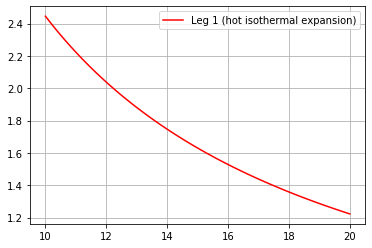

In [4]:
# Specify the volume we're going to
VB = AssignQuantity(20,'L')

# Get the volume & pressure along this isotherm
V_leg1, P_leg1 = PL.func_P_isotherm(VA,VB,n,R,TA,AssignQuantity,'atm')

# Graph this leg
plt.figure()
plt.plot(V_leg1,P_leg1,color='red',label='Leg 1 (hot isothermal expansion)')
plt.grid(True)
plt.legend()

### Getting remaining specs about point B
We already specified volume at B, and the end of leg 1 will tell us the pressure at B. The temperature *should* be equal to TA, but here we're deducing it from VB and PB as a check.

In [5]:
# Get PB from the last point of the previous leg 
PB = P_leg1[-1]

# Deduce temperature from ideal gas law (should be equal to TA)
TB = PB*VB/(n*R)
TB.ito('K')

# Report
print("VB =", VB)
print("TB =", TB)
print("PB =", PB)

VB = 20 liter
TB = 298.0000000000001 kelvin
PB = 1.2225867258820626 standard_atmosphere


### Adiabatic expansion from B to C
Now we'll specify our next destination volume (VC) and carry out an adiabatic expansion.

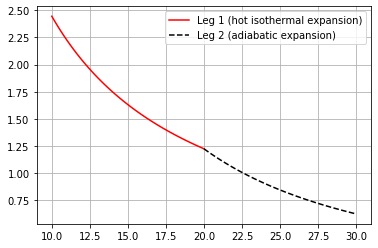

In [6]:
# Specify the volume we're going to
VC = AssignQuantity(30,'L')

# Get the volume & pressure along this adiabat
V_leg2, P_leg2 = PL.func_P_adiabat(VB,VC,n,R,TB,C_V,AssignQuantity,'atm')

# Graph leg 1 and leg 2
plt.figure()
plt.plot(V_leg1,P_leg1,color='red',label='Leg 1 (hot isothermal expansion)')
plt.plot(V_leg2,P_leg2,color='black',linestyle='dashed',label='Leg 2 (adiabatic expansion)')
plt.grid(True)
plt.legend()

### Your turn: Remaining specs about point C
First get the pressure, PC, from the last point of the previous leg. Since you already know VC, you can use the ideal gas law to deduce the temperature, TC.

In [7]:
# Get PC from the last point of the previous leg 
### BEGIN SOLUTION
PC = P_leg2[-1]
### END SOLUTION

# Deduce TC from ideal gas law at point C
### BEGIN SOLUTION
TC = PC*VC/(n*R)
TC.ito('K')
### END SOLUTION

# Report
### BEGIN SOLUTION
print("VC =", VC)
print("TC =", TC)
print("PC =", PC)
### END SOLUTION

VC = 30 liter
TC = 227.41656285392875 kelvin
PC = 0.6220055279439306 standard_atmosphere


### Your turn (again): Isothermal compression from C to D
Specify a volume, VD, that is *smaller* than VC, and then carry out an isothermal compression.

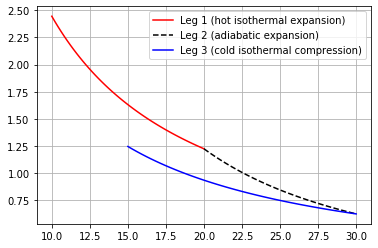

In [8]:
# Specify the volume we're going to
### BEGIN SOLUTION
VD = AssignQuantity(15,'L')
### END SOLUTION

# Get the volume & pressure along this isotherm
### BEGIN SOLUTION
V_leg3, P_leg3 = PL.func_P_isotherm(VC,VD,n,R,TC,AssignQuantity,'atm')
### END SOLUTION

# Graph legs 1, 2, and 3
### BEGIN SOLUTION
plt.figure()
plt.plot(V_leg1,P_leg1,'red',label='Leg 1 (hot isothermal expansion)')
plt.plot(V_leg2,P_leg2,'--k',label='Leg 2 (adiabatic expansion)')
plt.plot(V_leg3,P_leg3,'blue',label='Leg 3 (cold isothermal compression)')
plt.grid(True)
plt.legend()
### END SOLUTION

### Your turn (again): Remaining specs about point D
First get the pressure, PD, from the last point of leg 3. Since you already know VD, you can use the ideal gas law to deduce the temperature, TD -- but it should equal TC since leg 3 was an isothermal compression.

In [9]:
### BEGIN SOLUTION
PD = P_leg3[-1]
TD = PD*VD/(n*R)
TD.ito('K')
print("VD =", VD)
print("TD =", TD)
print("PD =", PD)
### END SOLUTION

VD = 15 liter
TD = 227.4165628539288 kelvin
PD = 1.2440110558878614 standard_atmosphere


### Your turn (again): Adiabatic compression from D to A
Lastly, carry out an adiabatic compression back to VA, beginning at temperature TD.

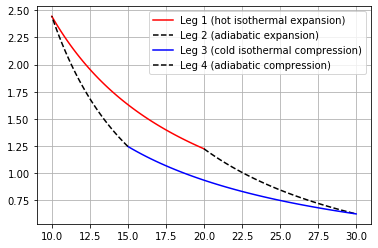

In [10]:
### BEGIN SOLUTION

# Get the volume & pressure along this adiabat
V_leg4, P_leg4 = PL.func_P_adiabat(VD,VA,n,R,TD,C_V,AssignQuantity,'atm')

# Graph it
plt.figure()
plt.plot(V_leg1,P_leg1,'red',label='Leg 1 (hot isothermal expansion)')
plt.plot(V_leg2,P_leg2,'--k',label='Leg 2 (adiabatic expansion)')
plt.plot(V_leg3,P_leg3,'blue',label='Leg 3 (cold isothermal compression)')
plt.plot(V_leg4,P_leg4,'--k',label='Leg 4 (adiabatic compression)')
plt.grid(True)
plt.legend()

### END SOLUTION

### Pause for revision
Unless you were very lucky, you probably didn't end up at the very same state you started at. Go back and revise volumes VB, VC, and/or VD so that you end up with a closed loop for your Carnot cycle. 

### Defining PV work
The function definition below uses numpy's trapezoidal function to calculate the work done by a given path (defined by Varray and Parray), and attaches units to the result!

In [11]:
def func_PVwork(Varray,Parray,AssignQuantity):
    w = -np.trapz(Parray,Varray)
    w = AssignQuantity(w,Varray.units*Parray.units)
    return w

### Evaluate the work for leg 1
Below, we use func_PVwork to calculate the work of leg 1. We also double-check using our analytical formula.

In [12]:
# Evaluate the work using func_PVwork
w_leg1 = func_PVwork(V_leg1, P_leg1, AssignQuantity)
w_leg1.ito('joule')
print("work (numerical)", w_leg1)

# Double-check using our analytical result, Eq. 2
w_leg1_analytical = -n*R*TA*np.log(VB/VA)
print("work (analytical)", w_leg1_analytical)

work (numerical) -1717.386536309327 joule
work (analytical) -1717.3220464342648 joule


### Evaluate the work for Leg 2
Below, use our numerical work function. We can't double-check though because we haven't derived an analytical formula for the work of an adiabatic expansion.

In [13]:
# Evaluate the work using func_PVwork
### BEGIN SOLUTION
w_leg2 = func_PVwork(V_leg2, P_leg2, AssignQuantity)
w_leg2.ito('joule')
print(w_leg2)
### END SOLUTION

-880.269721224846 joule


### Evaluate the work for Leg 3
Below, use our numerical work function, and double-check using our analytical formula.

In [14]:
# Evaluate the work using func_PVwork
### BEGIN SOLUTION
w_leg3 = func_PVwork(V_leg3, P_leg3, AssignQuantity)
w_leg3.ito('joule')
print("work (numerical)", w_leg3)
### END SOLUTION

# Double-check using our analytical result, Eq. 2
### BEGIN SOLUTION
w_leg3_analytical = -n*R*TC*np.log(VD/VC)
print("work (analytical)", w_leg3_analytical)
### END SOLUTION

work (numerical) 1310.6112187217489 joule
work (analytical) 1310.5620037360923 joule


### Evaluate the work for Leg 4
Below, use our numerical work function to evaluate the work of leg 4. We can't double-check, however, because we haven't derived an analytical formula for adiabatic compression.

In [15]:
# Evaluate the work using func_PVwork
### BEGIN SOLUTION
# Evaluating the work (theory and numerical)
w_leg4 = func_PVwork(V_leg4, P_leg4, AssignQuantity)
w_leg4.ito('joule')
print(w_leg4)
### END SOLUTION

880.2697212248463 joule


### Your turn: calculating efficiency
The observed efficiency is supposed to be close to the theoretical maximum efficiency. In the cell below, calculate each of these. Some notes about this:

- To get the observed efficiency, you need the *total* work, and the heat of Leg 1
- To get the theoretical efficiency, you need the temperatures of the hot and cold reservoirs

In [16]:
# Calculate the total work (Eq. 3)
### BEGIN SOLUTION
print(w_leg1)
print(w_leg2)
print(w_leg3)
print(w_leg4)
w_tot = w_leg1+w_leg2+w_leg3+w_leg4
### END SOLUTION

# Calculate the heat extracted from the hot reservoir (Eq. 4)
### BEGIN SOLUTION
q_hot = -w_leg1
### END SOLUTION

# Calculate the observed efficiency (Eq. 5)
### BEGIN SOLUTION
observed_efficiency = -w_tot/q_hot
print('Observed efficiency =', observed_efficiency*100, '%')
### END SOLUTION

# Calulate the theoretical maximum efficiency (Eq. 6)
### BEGIN SOLUTION
theoretical_efficiency = (TA-TC)/TA
print('Theoretical efficiency =', theoretical_efficiency*100, '%')
### END SOLUTION

-1717.386536309327 joule
-880.269721224846 joule
1310.6112187217489 joule
880.2697212248463 joule
Observed efficiency = 23.68571716311113 dimensionless %
Theoretical efficiency = 23.685717163111157 dimensionless %


### Pause for analysis
Your observed and theoretical maximum efficiencies should come pretty close to one another. If they don't, you should probably check your code in the cell above.

### Your turn: volume ratios
In the cell below, calculate the ratios $\dfrac{V_B}{V_A}$ and $\dfrac{V_C}{V_D}$ (see Eq. 7 in the Introduction). 

In [17]:
# Calculate and print the volume ratios
### BEGIN SOLUTION
print('VB/VA =', VB/VA)
print('VC/VD =', VC/VD)
### END SOLUTION

VB/VA = 2.0 dimensionless
VC/VD = 2.0 dimensionless


### Pause for analysis
These ratios should come pretty close to one another. If they don't, you should probably check your code in the cell above.

### Refresh/save/validate/close/submit/logout